## 1. Introduction

In [34]:
import pandas as pd

# load data into dataframe
# this dataset consists of average price for avocados
df = pd.read_csv("datasets/avocado.csv")

In [2]:
# view the first couple of rows
df.head()
# or
# df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df["AveragePrice"].head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [4]:
# create new df for avocados only from albany
albany_df = df[ df['region'] == 'Albany']
albany_df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            17603, 17604, 17605, 17606, 17607, 17608, 17609, 17610, 17611,
            17612],
           dtype='int64', length=338)

In [5]:
# albany_df.set_index("Date", inplace=True)
# or
# albany_df_by = albany_df.set_index("Date")
# or
albany_df_byDate = albany_df.set_index("Date")
albany_df_byDate.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
albany_df_byDate['AveragePrice'].plot()

## 2. Graphing/Visualization

In [39]:
import pandas as pd

df = pd.read_csv("datasets/avocado.csv")
# prevent multiple copies of rows through conventional AND organic type
df = df.copy()[df['type']=='organic']

# convert date column to actual date data for pandas
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date", inplace=True)

#df.sort_values(by="Date", ascending=True,inplace=True)

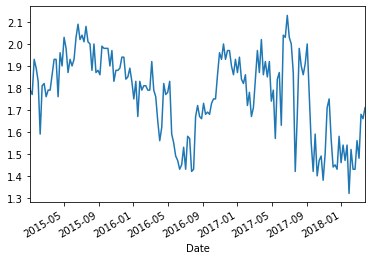

In [40]:
albany_df = df[ df['region'] == 'Albany']
albany_df['AveragePrice'].plot()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


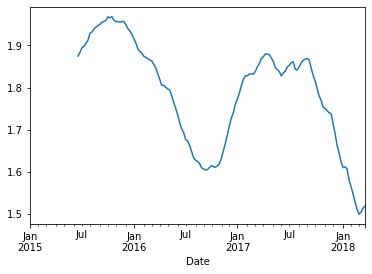

In [41]:
# sort dates in order
albany_df.sort_index(inplace=True)
# plot it with a rolling mean
albany_df['AveragePrice'].rolling(25).mean().plot()

In [42]:
# create new column
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean().values

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
albany_df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.79,1373.95,57.42,153.88,0.0,1162.65,1162.65,0.0,0.0,organic,2015,Albany,NaN
2015-01-11,50,1.77,1182.56,39.00,305.12,0.0,838.44,838.44,0.0,0.0,organic,2015,Albany,NaN
2015-01-18,49,1.93,1118.47,8.02,178.78,0.0,931.67,931.67,0.0,0.0,organic,2015,Albany,NaN
2015-01-25,48,1.89,1115.89,14.87,148.72,0.0,952.30,952.30,0.0,0.0,organic,2015,Albany,NaN
2015-02-01,47,1.83,1228.51,33.12,99.36,0.0,1096.03,1096.03,0.0,0.0,organic,2015,Albany,NaN


In [44]:
# drop rows with empty values
albany_df.dropna().head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-06-21,27,2.09,1053.73,17.59,107.87,0.0,928.27,928.27,0.0,0.0,organic,2015,Albany,1.8748
2015-06-28,26,2.02,1200.61,22.35,124.70,0.0,1053.56,1053.56,0.0,0.0,organic,2015,Albany,1.8840
2015-07-05,25,2.04,1573.19,50.69,183.90,0.0,1338.60,1338.60,0.0,0.0,organic,2015,Albany,1.8948
2015-07-12,24,2.01,1175.34,34.27,92.17,0.0,1048.90,1048.90,0.0,0.0,organic,2015,Albany,1.8980
2015-07-19,23,2.08,1076.23,50.86,112.36,0.0,913.01,913.01,0.0,0.0,organic,2015,Albany,1.9056


In [48]:
# to create a new df without getting warnings:
albany_df = df.copy()[df['region'] == "Albany"]
albany_df.sort_index(inplace=True)
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean().values

In [46]:
# view all region values
row_list = df['region'].values.tolist()
regions = list(set(row_list))
regions
# MESSY

['Spokane',
 'TotalUS',
 'Boise',
 'MiamiFtLauderdale',
 'California',
 'Indianapolis',
 'CincinnatiDayton',
 'Jacksonville',
 'Plains',
 'Detroit',
 'Louisville',
 'RichmondNorfolk',
 'Orlando',
 'NewYork',
 'SouthCarolina',
 'Philadelphia',
 'Syracuse',
 'Roanoke',
 'Pittsburgh',
 'NewOrleansMobile',
 'DallasFtWorth',
 'SouthCentral',
 'Houston',
 'Nashville',
 'HarrisburgScranton',
 'BuffaloRochester',
 'Charlotte',
 'Denver',
 'Chicago',
 'GrandRapids',
 'HartfordSpringfield',
 'Midsouth',
 'Boston',
 'RaleighGreensboro',
 'StLouis',
 'PhoenixTucson',
 'Sacramento',
 'Tampa',
 'Portland',
 'NorthernNewEngland',
 'Atlanta',
 'BaltimoreWashington',
 'LasVegas',
 'SanDiego',
 'Southeast',
 'Albany',
 'Columbus',
 'WestTexNewMexico',
 'West',
 'SanFrancisco',
 'LosAngeles',
 'Northeast',
 'Seattle',
 'GreatLakes']

In [47]:
# better way:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [50]:
graph_df = pd.DataFrame()

for region in df['region'].unique():
    print(region)
    region_df = df.copy()[df['region'] == region]
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean().values
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])
    

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes
HarrisburgScranton
HartfordSpringfield
Houston
Indianapolis
Jacksonville
LasVegas
LosAngeles
Louisville
MiamiFtLauderdale
Midsouth
Nashville
NewOrleansMobile
NewYork
Northeast
NorthernNewEngland
Orlando
Philadelphia
PhoenixTucson
Pittsburgh
Plains
Portland
RaleighGreensboro
RichmondNorfolk
Roanoke
Sacramento
SanDiego
SanFrancisco
Seattle
SouthCarolina
SouthCentral
Southeast
Spokane
StLouis
Syracuse
Tampa
TotalUS
West
WestTexNewMexico


In [51]:
graph_df.tail()

,Albany_price25ma,Atlanta_price25ma,BaltimoreWashington_price25ma,Boise_price25ma,Boston_price25ma,BuffaloRochester_price25ma,California_price25ma,Charlotte_price25ma,Chicago_price25ma,CincinnatiDayton_price25ma,...,SouthCarolina_price25ma,SouthCentral_price25ma,Southeast_price25ma,Spokane_price25ma,StLouis_price25ma,Syracuse_price25ma,Tampa_price25ma,TotalUS_price25ma,West_price25ma,WestTexNewMexico_price25ma
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.5112,1.8660,1.5836,2.0512,1.7636,1.2912,1.9128,2.0548,1.8160,1.7752,...,1.6184,1.5728,1.7116,2.1544,1.9240,1.3156,1.7204,1.7144,1.8620,1.8708
2018-03-04,1.4992,1.8288,1.5772,2.0176,1.7708,1.2744,1.8876,2.0180,1.8024,1.7564,...,1.5952,1.5592,1.6868,2.1040,1.8868,1.3004,1.7104,1.6940,1.8220,1.8372
2018-03-11,1.5044,1.7844,1.5732,1.9836,1.7824,1.2652,1.8636,1.9764,1.7836,1.7216,...,1.5612,1.5400,1.6484,2.0552,1.8468,1.2932,1.6916,1.6748,1.7912,1.8052
2018-03-18,1.5140,1.7412,1.5684,1.9520,1.7932,1.2560,1.8516,1.9444,1.7732,1.6860,...,1.5312,1.5204,1.6156,2.0012,1.8192,1.2848,1.6776,1.6588,1.7644,1.7772
2018-03-25,1.5188,1.6936,1.5568,1.9128,1.7984,1.2416,1.8364,1.9024,1.7672,1.6720,...,1.5004,1.5072,1.5820,1.9496,1.7976,1.2700,1.6484,1.6428,1.7304,1.7472


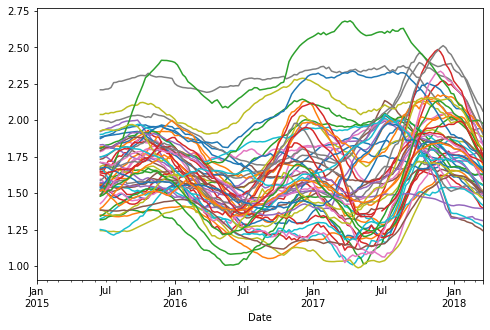

In [53]:
graph_df.plot(figsize=(8,5), legend=False)

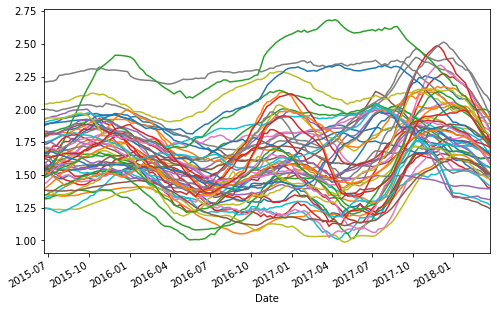

In [56]:
graph_df.dropna().plot(figsize=(8,5), legend=False)

## 3. Groupby

In [58]:
import pandas as pd

# table_data is 'unclean', load it correctly then save a new csv
df = pd.read_csv('datasets/min-wage.csv', encoding="latin")
df.to_csv('datasets/min-wage-clean.csv', encoding="utf-8")

In [59]:
# load the utf-8 encoded csv
df = pd.read_csv('datasets/min-wage-clean.csv')
df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [62]:
# create grouby object
gb = df.groupby("State")
gb.get_group("California").set_index("Year").head()

,Unnamed: 0,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
Year,,,,,,,,,
1968,4,California,1.65(b),(b),1.65,1.65,34.783333,11.88,11.88
1969,59,California,1.65(b),(b),1.65,1.65,36.683333,11.26,11.26
1970,114,California,1.65(b),(b),1.65,1.65,38.825000,10.64,10.64
1971,169,California,1.65(b),(b),1.65,1.65,40.491667,10.20,10.20
1972,224,California,1.65(b),(b),1.65,1.65,41.816667,9.88,9.88


In [66]:
# create df with states as columns
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
        
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))
    

In [67]:
act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [69]:
act_min_wage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.0,50.000000,39.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,9.583800,2.316200,6.781600,8.632800,6.389800,8.823600,7.498800,8.343200,7.773200,...,0.0,5.541200,6.643590,6.836600,8.657400,5.897400,8.301800,7.166400,7.694200,5.149200
std,0.0,1.845176,3.474504,1.341223,1.187508,1.521052,1.023613,1.265436,1.476133,0.887354,...,0.0,2.202229,1.590176,0.819367,0.984647,2.726151,1.868613,0.793673,0.762675,1.998928
min,0.0,7.380000,0.000000,1.070000,6.420000,3.840000,6.820000,4.410000,5.510000,6.220000,...,0.0,0.000000,4.390000,4.790000,6.800000,0.000000,4.410000,5.580000,6.420000,2.260000
25%,0.0,8.252500,0.000000,6.522500,7.695000,5.072500,7.865000,7.015000,7.097500,7.172500,...,0.0,4.762500,5.105000,6.317500,7.800000,5.892500,7.227500,6.630000,7.107500,3.270000
50%,0.0,8.890000,0.000000,6.920000,8.670000,6.375000,9.075000,7.845000,8.510000,7.655000,...,0.0,6.070000,6.770000,6.930000,8.885000,6.855000,9.055000,7.075000,7.580000,5.445000
75%,0.0,10.492500,3.147500,7.290000,9.307500,7.677500,9.455000,8.327500,9.140000,8.242500,...,0.0,7.105000,7.830000,7.470000,9.372500,7.620000,9.672500,7.612500,8.145000,6.607500
max,0.0,15.120000,10.220000,8.680000,11.880000,9.500000,11.080000,9.580000,12.000000,10.010000,...,0.0,8.380000,10.010000,8.330000,10.320000,8.800000,11.520000,9.130000,9.660000,8.980000


In [71]:
# get correlations
act_min_wage.corr().head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,1.000000,0.018638,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,...,NaN,-0.522472,0.277016,-0.020462,0.663558,-0.601640,0.411593,0.044814,0.702570,0.727932
Arizona,NaN,0.018638,1.000000,0.089395,0.498994,0.742527,0.458163,0.429836,0.590848,-0.049914,...,NaN,0.369900,-0.758607,0.439344,0.517960,0.047405,0.587975,0.584596,0.131588,0.346528
Arkansas,NaN,-0.377934,0.089395,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,...,NaN,0.503242,-0.204485,0.194680,0.087429,0.582192,-0.072343,0.420819,0.000470,-0.250592
California,NaN,0.717653,0.498994,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,...,NaN,-0.239533,-0.417782,0.392898,0.877922,-0.326364,0.754085,0.371765,0.584067,0.722617


In [73]:
# columns with missing data
issue_df = df[df['Low.2018']==0]
issue_df['State'].unique()

array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

In [ ]:
import numpy as np

# drop columns with NaN data
act_min_wage.replace(0, np.NaN).dropna(axis=1).corr().head()

In [75]:
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr().head()

for problem in issue_df['State'].unique():
    if problem in min_wage_corr.columns:
        print("Something is missing here...")

In [76]:
grp_issues = issue_df.groupby('State')

grp_issues.get_group('Alabama').head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
55,55,1969,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
110,110,1970,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
165,165,1971,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
220,220,1972,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


In [77]:
# make sure they are in fact empty
for state, data in grp_issues:
    if data['Low.2018'].sum() != 0.0:
        print("We missed something!")

## 4. Visualizing Correlation Table

In [78]:
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/min-wage-clean.csv')

In [79]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
        
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))

In [81]:
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()
min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


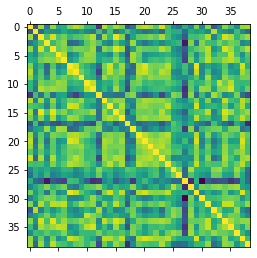

In [82]:
import matplotlib.pyplot as plt

# plot the correlation table
plt.matshow(min_wage_corr)
# could be better

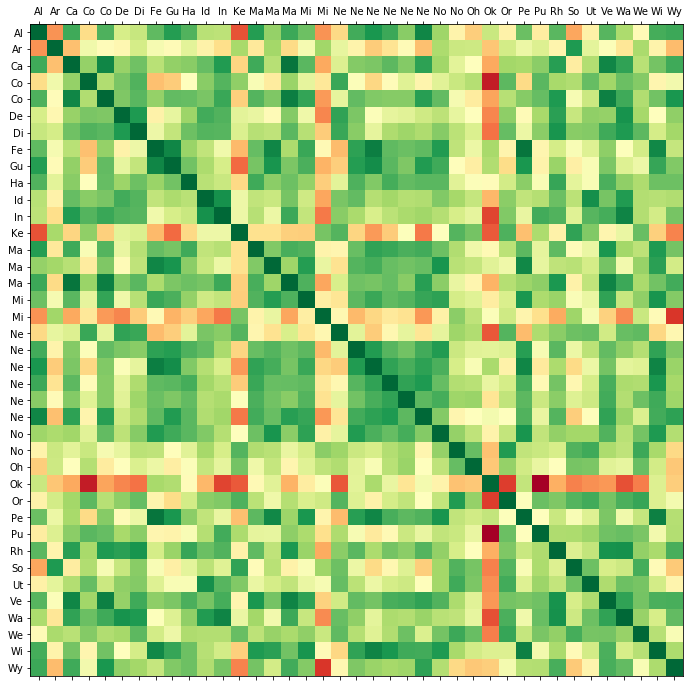

In [89]:
# labels will be first 2 letters of each state
labels = [col[:2] for col in min_wage_corr.columns]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # fig 1 in a 1 by 1 grid
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn) 

ax.set_xticks(np.arange(len(labels))) # fix axis label spacing
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels) # set axis labels to states
ax.set_yticklabels(labels)

plt.show()

Some states get the same abbreviation...
Let's fix it.

In [91]:
import requests

html = requests.get("https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes")

# get dataframe(s)
dfs = pd.read_html(html.text)

In [92]:
# check dataframes
for df in dfs:
    print(df.head())

  State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA
  Territory/Associate Abbreviation Postal Code
0      American Samoa          NaN          AS
1                Guam         Guam          GU
2    Marshall Islands          NaN          MH
3          Micronesia          NaN          FM
4   Northern Marianas          NaN          MP


In [93]:
states = dfs[0]
states.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [94]:
states.to_csv("datasets/state_abbrev.csv", index=False)

In [96]:
states = pd.read_csv("datasets/state_abbrev.csv", index_col=0)
states

,Abbreviation,Postal Code
State/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA
Colorado,Colo.,CO
Connecticut,Conn.,CT
Delaware,Del.,DE
District of Columbia,D.C.,DC


In [102]:
abbrev_dict = states[["Postal Code"]].to_dict()
abbrev_dict = abbrev_dict["Postal Code"]
abbrev_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [105]:
abbrev_dict['Federal (FLSA)'] = "FD"
abbrev_dict['Guam'] = "GU"
abbrev_dict['Puerto Rico'] = "PR"

labels = [abbrev_dict[col] for col in min_wage_corr.columns]

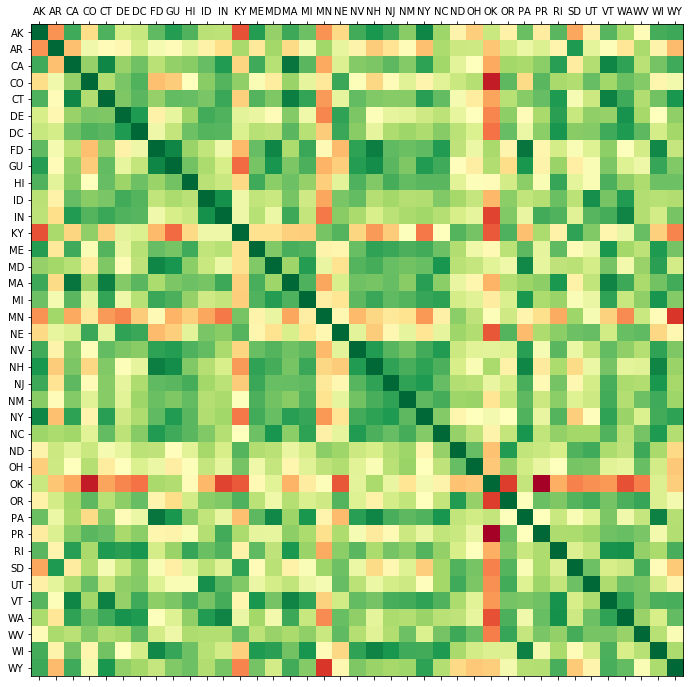

In [106]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) # fig 1 in a 1 by 1 grid
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn) 

ax.set_xticks(np.arange(len(labels))) # fix axis label spacing
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels) # set axis labels to states
ax.set_yticklabels(labels)

plt.show()

---

## 5. Combining Multiple Datasets

In [186]:
import pandas as pd
import numpy as np

unemployment = pd.read_csv("datasets/unemployment-county.csv")
unemployment.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [187]:
df = pd.read_csv('datasets/min-wage-clean.csv')
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
        
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))
     

act_min_wage = act_min_wage.replace(0, np.NaN).dropna(axis=1)   
act_min_wage.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,15.12,1.12,11.88,7.20,10.08,9.00,9.00,8.28,9.00,9.00,...,8.28,3.10,10.08,3.06,7.20,10.08,11.52,7.20,9.00,8.64
1969,14.33,1.07,11.26,6.83,9.56,8.53,8.53,7.85,8.53,8.53,...,7.85,2.94,9.56,2.90,6.83,9.56,10.92,6.83,8.53,8.19
1970,13.54,7.09,10.64,6.45,10.32,8.06,10.32,8.38,10.32,10.32,...,8.38,2.77,10.32,6.45,6.45,10.32,10.32,6.45,8.38,8.38
1971,12.99,6.80,10.20,6.18,9.89,7.73,9.89,8.04,9.89,9.89,...,8.04,2.66,9.89,6.18,6.18,9.89,9.89,6.18,8.04,8.04
1972,12.57,7.19,9.88,5.99,11.08,9.58,9.58,9.58,11.38,9.58,...,9.58,3.89,9.58,5.99,7.19,9.58,9.58,7.19,8.68,8.98


In [207]:
def get_min_wage(year,state):
    try:
        return act_min_wage.loc[year][state]
    except:
        return np.NaN
    
get_min_wage(2012, "California")

8.72

In [208]:
%%time

unemployment["min_wage"] = list(map(get_min_wage, unemployment['Year'], unemployment['State']))

CPU times: user 1min 41s, sys: 334 ms, total: 1min 42s
Wall time: 1min 42s


In [210]:
unemployment.head()

,Year,Month,State,County,Rate,min_wage
0,2015,February,Mississippi,Newton County,6.1,NaN
1,2015,February,Mississippi,Panola County,9.4,NaN
2,2015,February,Mississippi,Monroe County,7.9,NaN
3,2015,February,Mississippi,Hinds County,6.1,NaN
4,2015,February,Mississippi,Kemper County,10.6,NaN


In [211]:
pres16 = pd.read_csv("datasets/pres16results.csv")
pres16.head()

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [212]:
len(unemployment)
# dataset is huge, we will filter it down to feb 2015

885548

In [213]:
unemploy15 = unemployment.copy()[(unemployment['Year']==2015) & (unemployment['Month']=="February")]
unemploy15.head()

,Year,Month,State,County,Rate,min_wage
0,2015,February,Mississippi,Newton County,6.1,NaN
1,2015,February,Mississippi,Panola County,9.4,NaN
2,2015,February,Mississippi,Monroe County,7.9,NaN
3,2015,February,Mississippi,Hinds County,6.1,NaN
4,2015,February,Mississippi,Kemper County,10.6,NaN


In [214]:
pres16["cand"].unique()

array(['Donald Trump', 'Hillary Clinton', 'Gary Johnson', 'Jill Stein',
       'Evan McMullin', 'Darrell Castle', 'Gloria La Riva',
       'Rocky De La Fuente', ' None of these candidates',
       'Richard Duncan', 'Dan Vacek', 'Alyson Kennedy', 'Mike Smith',
       'Chris Keniston', 'Lynn Kahn', 'Jim Hedges', 'Monica Moorehead',
       'Peter Skewes', 'Emidio Soltysik', 'Scott Copeland',
       'Tom Hoefling', 'Rocky Giordani', 'Laurence Kotlikoff',
       'Kyle Kopitke', 'Joseph Maldonado', 'Michael Maturen',
       'Princess Jacob', 'Ryan Scott', 'Rod Silva', 'Jerry White',
       'Bradford Lyttle', 'Frank Atwood', nan], dtype=object)

In [215]:
states = pd.read_csv("datasets/state_abbrev.csv", index_col=0)
states = states[["Postal Code"]]
states.head()

,Postal Code
State/District,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


In [216]:
states_dict = states.to_dict()["Postal Code"]
states_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [217]:
unemploy15["State"] = unemploy15["State"].map(states_dict)

In [218]:
unemploy15

,Year,Month,State,County,Rate,min_wage
0,2015,February,MS,Newton County,6.1,NaN
1,2015,February,MS,Panola County,9.4,NaN
2,2015,February,MS,Monroe County,7.9,NaN
3,2015,February,MS,Hinds County,6.1,NaN
4,2015,February,MS,Kemper County,10.6,NaN
5,2015,February,MS,Calhoun County,6.9,NaN
6,2015,February,MS,Clarke County,7.9,NaN
7,2015,February,MS,Jefferson County,14.3,NaN
8,2015,February,MS,Madison County,4.5,NaN
9,2015,February,MS,Sharkey County,11.1,NaN


In [219]:
print(len(unemploy15))
print(len(pres16))

2802
18475


In [220]:
pres16.rename(columns={"county":"County", "st":"State"}, inplace=True)
pres16.head()

,County,fips,cand,State,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [221]:
for df in [unemploy15, pres16]:
    df.set_index(["County", "State"], inplace=True)

In [222]:
pres16_cand = pres16.copy()[pres16['cand'] == 'Hillary Clinton']
pres16_cand = pres16_cand[["pct"]]
pres16_cand.dropna(inplace=True)
pres16_cand.head()

pct
County State          
NaN    US     0.477938
       CA     0.615791
       FL     0.477881
       TX     0.434428
       NY     0.588103

In [223]:
all_together = unemploy15.merge(pres16_cand, on=["County", "State"])
all_together.dropna(inplace=True)
all_together.head()

,,Year,Month,Rate,min_wage,pct
County,State,,,,,
Major County,OK,2015,February,2.6,2.11,0.091203
Pottawatomie County,OK,2015,February,4.5,2.11,0.236259
Johnston County,OK,2015,February,6.5,2.11,0.195451
Jefferson County,OK,2015,February,5.0,2.11,0.155650
Beaver County,OK,2015,February,2.8,2.11,0.078677


In [224]:
all_together.drop("Year", axis=1, inplace=True)
all_together.head()

,,Month,Rate,min_wage,pct
County,State,,,,
Major County,OK,February,2.6,2.11,0.091203
Pottawatomie County,OK,February,4.5,2.11,0.236259
Johnston County,OK,February,6.5,2.11,0.195451
Jefferson County,OK,February,5.0,2.11,0.155650
Beaver County,OK,February,2.8,2.11,0.078677


In [225]:
all_together.corr()

,Rate,min_wage,pct
Rate,1.000000,0.186689,0.119181
min_wage,0.186689,1.000000,0.314871
pct,0.119181,0.314871,1.000000


In [226]:
all_together.cov()

,Rate,min_wage,pct
Rate,5.743199,0.683870,0.043200
min_wage,0.683870,2.336451,0.072796
pct,0.043200,0.072796,0.022877


---

## 6. Machine Learning with Scikit-Learn

In [229]:
import pandas as pd

diamonds = pd.read_csv("datasets/diamonds.csv", index_col=0)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


need to convert categorical values to numerical values

In [233]:
diamonds["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [235]:
# assign each string value as a numerical code
# better used for classification
diamonds["cut"].astype("category").cat.codes

1        2
2        3
3        1
4        3
5        1
6        4
7        4
8        4
9        0
10       4
11       1
12       2
13       3
14       2
15       3
16       3
17       2
18       1
19       1
20       4
21       1
22       4
23       4
24       4
25       4
26       4
27       3
28       4
29       4
30       4
        ..
53911    3
53912    3
53913    3
53914    1
53915    1
53916    2
53917    1
53918    4
53919    3
53920    2
53921    4
53922    4
53923    4
53924    2
53925    2
53926    2
53927    2
53928    1
53929    3
53930    2
53931    3
53932    3
53933    4
53934    4
53935    3
53936    2
53937    1
53938    4
53939    3
53940    2
Length: 53940, dtype: int8

In [241]:
# conversion
cut_dict = {'Ideal':5, 'Premium':4, 'Very Good':3, 'Good':2, 'Fair':1}
clarity_dict = {"I3":1, "I2":2, "I3":3, "SI2":4, "SI1":5, "VS2":6, "VS1":7, "VVS2":8, "VVS1": 9, "IF": 10, "FL":11}
color_dict = {"J":1, "I":2, "H":3, "G":4, "F":5, "E":6, "D":7}

diamonds['cut'] = diamonds["cut"].map(cut_dict)
diamonds['clarity'] = diamonds["clarity"].map(clarity_dict)
diamonds['color'] = diamonds["color"].map(color_dict)

In [242]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,4.0,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,5.0,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,7.0,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,6.0,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,4.0,63.3,58.0,335,4.34,4.35,2.75


In [266]:
import sklearn
from sklearn import svm, preprocessing

diamonds = sklearn.utils.shuffle(diamonds)
diamonds = diamonds.dropna()

In [267]:
X = diamonds.drop("price", axis=1).values
# scale the features
X = preprocessing.scale(X)
y = diamonds['price'].values

test_size = 200

X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

In [269]:
clf = svm.SVR(kernel="linear")
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [270]:
clf.score(X_test, y_test)

0.883541636505364

In [272]:
for X,y in zip(X_test, y_test):
    print(f'Model Prediction: {clf.predict([X])[0]}, True Value: {y}')

Model Prediction: 1216.9943760670426, True Value: 1021
Model Prediction: 4248.048874544261, True Value: 3806
Model Prediction: 8665.238528508444, True Value: 9513
Model Prediction: 1131.873814286142, True Value: 939
Model Prediction: 2450.2886734625336, True Value: 2117
Model Prediction: 8322.140430236133, True Value: 8499
Model Prediction: 944.1515234386388, True Value: 776
Model Prediction: 4999.620306191233, True Value: 4478
Model Prediction: 372.324179094795, True Value: 472
Model Prediction: 5356.016594819459, True Value: 7569
Model Prediction: 405.4307004843786, True Value: 911
Model Prediction: 8870.422749040792, True Value: 11863
Model Prediction: 1262.0466708506337, True Value: 1000
Model Prediction: 2833.406040255697, True Value: 2386
Model Prediction: -378.41458810044014, True Value: 425
Model Prediction: 4193.521168343204, True Value: 3640
Model Prediction: 5623.618426292372, True Value: 7281
Model Prediction: 484.60632017490207, True Value: 702
Model Prediction: 4461.60233

In [273]:
clf = svm.SVR(kernel="rbf")
clf.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [274]:
print(clf.score(X_test, y_test))

for X,y in zip(X_test, y_test):
    print(f'Model Prediction: {clf.predict([X])[0]}, True Value: {y}')

0.5562571551470936
Model Prediction: 1155.298678013366, True Value: 1021
Model Prediction: 3497.45002750231, True Value: 3806
Model Prediction: 5521.365022589946, True Value: 9513
Model Prediction: 1307.9365621678937, True Value: 939
Model Prediction: 2270.874541605932, True Value: 2117
Model Prediction: 6652.507904426644, True Value: 8499
Model Prediction: 898.1719776809346, True Value: 776
Model Prediction: 4443.07630455899, True Value: 4478
Model Prediction: 2027.0353737269736, True Value: 472
Model Prediction: 5398.568705631183, True Value: 7569
Model Prediction: 817.2198565560898, True Value: 911
Model Prediction: 6413.2979883502885, True Value: 11863
Model Prediction: 1008.4003087067954, True Value: 1000
Model Prediction: 2777.5764154823637, True Value: 2386
Model Prediction: 880.1087378077559, True Value: 425
Model Prediction: 3624.582304129613, True Value: 3640
Model Prediction: 4865.014924439869, True Value: 7281
Model Prediction: 656.2550704800797, True Value: 702
Model Predi

### Trying out ridge regression:

In [276]:
from sklearn import linear_model

reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [277]:
print(reg.score(X_test, y_test))

for X,y in zip(X_test, y_test):
    print(f'Model Prediction: {clf.predict([X])[0]}, True Value: {y}')

0.9332478159350927
Model Prediction: 1155.298678013366, True Value: 1021
Model Prediction: 3497.45002750231, True Value: 3806
Model Prediction: 5521.365022589946, True Value: 9513
Model Prediction: 1307.9365621678937, True Value: 939
Model Prediction: 2270.874541605932, True Value: 2117
Model Prediction: 6652.507904426644, True Value: 8499
Model Prediction: 898.1719776809346, True Value: 776
Model Prediction: 4443.07630455899, True Value: 4478
Model Prediction: 2027.0353737269736, True Value: 472
Model Prediction: 5398.568705631183, True Value: 7569
Model Prediction: 817.2198565560898, True Value: 911
Model Prediction: 6413.2979883502885, True Value: 11863
Model Prediction: 1008.4003087067954, True Value: 1000
Model Prediction: 2777.5764154823637, True Value: 2386
Model Prediction: 880.1087378077559, True Value: 425
Model Prediction: 3624.582304129613, True Value: 3640
Model Prediction: 4865.014924439869, True Value: 7281
Model Prediction: 656.2550704800797, True Value: 702
Model Predi